In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier 
from  sklearn.svm import SVC
from sklearn.naive_bayes import GradientBoostingClassifier, MultinomialNB


In [13]:
from sklearn.datasets import load_wine

#The result of load_wine() is a map-like object with four components: ['target', 'data', 'DESCR', 'feature_names']:

wine = load_wine() 

df = pd.DataFrame( wine.data , columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
wine.feature_names #1D numpy array of names of the attributes

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [23]:
wine.data #2D numpy array of attribute values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [24]:
wine.DESCR #text description of the dataset

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [25]:
wine.target #1D numpy array of target attribute values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [33]:
df['target'] = wine['target']
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [43]:

'''
## Read column names from file
cols = list(pd.read_csv("sample_data.csv", nrows =1))
print(cols)

# Use list comprehension to remove the unwanted column in **usecol**
df= pd.read_csv("sample_data.csv", usecols =[i for i in cols if i != 'name'])

'''

#X = df.loc[:, df.columns!='target']

X = df.drop(['target'], axis = 1)
y = df.target

In [63]:
X_train , X_test, y_train , y_test = train_test_split(X, y , random_state = 123, test_size = 0.3)


clf_rfclf = RandomForestClassifier()
clf_rfclf.fit(X_train, y_train)
y_pred = clf_rfclf.predict(X_test)

accuracy_clf_rfclf =  accuracy_score(y_pred, y_test)
print(accuracy_clf_rfclf*100)


'''
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier 
from  sklearn.svm import SVC
from sklearn.naive_bayes import  MultinomialNB

'''

clf_grclf = GradientBoostingClassifier()
clf_grclf.fit(X_train, y_train)
y_pred = clf_grclf.predict(X_test)

accuracy_clf_grclf =  accuracy_score(y_pred, y_test)
print(accuracy_clf_grclf*100)


C:\Users\Zenia\Miniconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


90.74074074074075
88.88888888888889


In [69]:

clf_sgdclf = SGDClassifier()
clf_sgdclf.fit(X_train, y_train)
y_pred = clf_sgdclf.predict(X_test)

accuracy_clf_sgdclf =  accuracy_score(y_pred, y_test)
print(accuracy_clf_sgdclf*100)


clf_svcclf = SVC()
clf_svcclf.fit(X_train, y_train)
y_pred = clf_svcclf.predict(X_test)

accuracy_clf_svcclf =  accuracy_score(y_pred, y_test)
print(accuracy_clf_svcclf*100)



51.85185185185185
37.03703703703704


C:\Users\Zenia\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Zenia\Miniconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


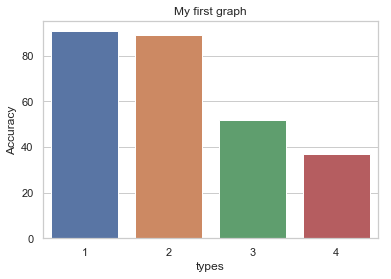

In [79]:
# x axis values 
x =['1', '2', '3', '4'] 
  
# y axis values 
y =[accuracy_clf_rfclf*100, accuracy_clf_grclf*100, accuracy_clf_sgdclf*100, accuracy_clf_svcclf*100] 
  
# plotting strip plot with seaborn 
ax = sns.barplot(x, y); 
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='types', ylabel ='Accuracy') 
  
# giving title to the plot 
plt.title('My first graph'); 
  
# function to show plot 
plt.show() 